## SMOTE (Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Oversampling Technique) is a technique used in machine learning to address the imbalanced dataset where the minority class has significaantly fewer instaances than the majority class. SMOTE involves generating synthetic instances of the minoority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification

In [5]:
X,y = make_classification(
    n_samples=1000,
    n_features=2,
    n_clusters_per_class=1,
    weights=[0.90],
    random_state=12,
    n_redundant=0
)

In [6]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

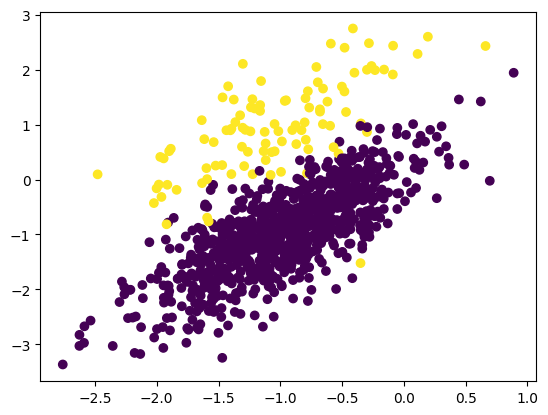

In [8]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
## Transforming the dataset using the SMOTE
oversample = SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [11]:
X.shape

(1800, 2)

In [12]:
y.shape

(1800,)

In [16]:
len(y[y==1])

900

In [17]:
len(y[y==0])

900

In [18]:
## Again creating the datafraame using the oversampled data
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)

In [19]:
oversample_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [20]:
oversample_df.tail()

,f1,f2,target
1795,-0.393549,1.013476,1
1796,-1.290617,0.917420,1
1797,-0.774439,0.705263,1
1798,-1.271776,0.908490,1
1799,-0.780735,2.055696,1


In [21]:
oversample_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

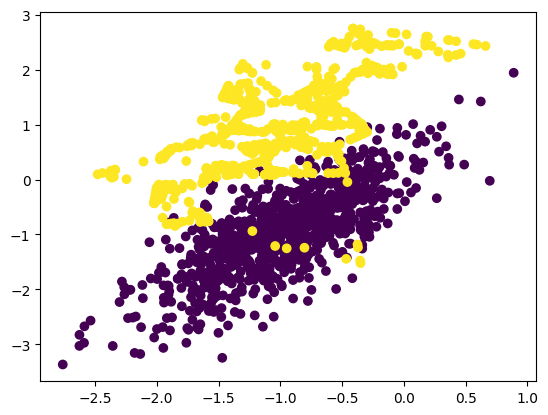

In [22]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])